In [31]:
# Cell 1: Importing necessary libraries
import numpy as np
import pandas as pd
import math
import operator
import random
import matplotlib.pyplot as plt
from itertools import product

In [32]:
# Cell 2: City class definition
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xCor = abs(self.x - city.x)
        yCor = abs(self.y - city.y)
        dist = np.sqrt(xCor ** 2 + yCor ** 2)
        return dist

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [33]:
# Cell 3: Creating distance matrix
def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[j]))
    return distance_matrix

citylist = []
for i in range(0, 25):
    citylist.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

print("Cities: ", citylist)

distance_matrix = create_distance_matrix([[city.x, city.y] for city in citylist])

Cities:  [(166,166), (90,129), (96,3), (49,190), (150,25), (28,56), (14,167), (167,41), (110,117), (174,192), (68,19), (34,87), (101,116), (15,18), (54,197), (46,34), (73,34), (52,190), (66,36), (115,189), (45,23), (172,121), (180,162), (54,81), (55,115)]


In [34]:
# Cell 4: ACO parameters
num_ants_list = [10, 20, 30]
num_iterations_list = [10, 20, 25]
alpha_list = [0.5, 1.0, 1.5, 2.0]
beta_list = [2.0, 3.0, 5.0]
evaporation_rate_list = [0.1, 0.3, 0.5, 0.7]
Q_list = [1.0, 5.0, 10.0]

In [35]:
# Cell 5: Helper functions
def initialize_pheromone_matrix(n):
    return np.ones((n, n))

def calculate_probabilities(pheromone, visibility, alpha, beta):
    pheromone_alpha = np.power(pheromone, alpha)
    visibility_beta = np.power(visibility, beta)
    product = pheromone_alpha * visibility_beta
    if np.sum(product) == 0:
        return np.ones_like(product) / len(product)  # To avoid nan values, distribute the probability evenly
    return product / np.sum(product)


def update_pheromones(pheromones, delta_pheromones, evaporation_rate):
    return (1 - evaporation_rate) * pheromones + delta_pheromones

def delta_pheromones_for_ant(ant_path, Q, distance_matrix):
    n = len(ant_path)
    delta_pheromones = np.zeros((n, n))
    for i in range(n - 1):
        delta_pheromones[ant_path[i], ant_path[i + 1]] = Q / distance_matrix[ant_path[i], ant_path[i + 1]]
    delta_pheromones[ant_path[-1], ant_path[0]] = Q / distance_matrix[ant_path[-1], ant_path[0]]
    return delta_pheromones

In [36]:
# Cell 6: ACO algorithm implementation
def aco_tsp(distance_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate, Q):
    num_nodes = distance_matrix.shape[0]
    pheromone_matrix = initialize_pheromone_matrix(num_nodes)
    best_path = None
    best_path_length = np.inf
    
    visibility = 1 / (distance_matrix + np.eye(num_nodes))  # Adding np.eye to avoid division by zero

    for iteration in range(num_iterations):
        ant_paths = []
        for ant in range(num_ants):
            visited_nodes = [np.random.randint(num_nodes)]
            while len(visited_nodes) < num_nodes:
                current_node = visited_nodes[-1]
                probabilities = calculate_probabilities(pheromone_matrix[current_node], visibility[current_node], alpha, beta)
                probabilities[visited_nodes] = 0
                probabilities /= probabilities.sum()
                next_node = np.random.choice(range(num_nodes), p=probabilities)
                visited_nodes.append(next_node)
            ant_paths.append(visited_nodes)
        
        all_delta_pheromones = np.zeros((num_nodes, num_nodes))
        for path in ant_paths:
            path_length = sum(distance_matrix[path[i], path[i+1]] for i in range(num_nodes - 1))
            path_length += distance_matrix[path[-1], path[0]]
            if path_length < best_path_length:
                best_path_length = path_length
                best_path = path
            
            delta_pheromones = delta_pheromones_for_ant(path, Q, distance_matrix)
            all_delta_pheromones += delta_pheromones
        
        pheromone_matrix = update_pheromones(pheromone_matrix, all_delta_pheromones, evaporation_rate)
        print(f"Iteration {iteration+1}/{num_iterations}, Best path length: {best_path_length}")
    
    return best_path, best_path_length

def run_aco_with_parameters(distance_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate, Q):
    best_path, best_path_length = aco_tsp(
        distance_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate, Q
    )
    return best_path_length

In [37]:
# Cell 7: Run grid search
best_params = None
best_path_length = np.inf

for num_ants, num_iterations, alpha, beta, evaporation_rate, Q in product(
    num_ants_list, num_iterations_list, alpha_list, beta_list, evaporation_rate_list, Q_list
):
    print(f"Testing parameters: num_ants={num_ants}, num_iterations={num_iterations}, alpha={alpha}, beta={beta}, evaporation_rate={evaporation_rate}, Q={Q}")
    path_length = run_aco_with_parameters(distance_matrix, num_ants, num_iterations, alpha, beta, evaporation_rate, Q)
    print(f"Path length: {path_length}")
    if path_length < best_path_length:
        best_path_length = path_length
        best_params = (num_ants, num_iterations, alpha, beta, evaporation_rate, Q)

print(f"Best path length: {best_path_length}")
print(f"Best parameters: num_ants={best_params[0]}, num_iterations={best_params[1]}, alpha={best_params[2]}, beta={best_params[3]}, evaporation_rate={best_params[4]}, Q={best_params[5]}")


Testing parameters: num_ants=10, num_iterations=10, alpha=0.5, beta=2.0, evaporation_rate=0.1, Q=1.0
Iteration 1/10, Best path length: 1053.1295565744597
Iteration 2/10, Best path length: 1053.1295565744597
Iteration 3/10, Best path length: 1053.1295565744597
Iteration 4/10, Best path length: 1053.1295565744597
Iteration 5/10, Best path length: 1053.1295565744597
Iteration 6/10, Best path length: 1053.1295565744597
Iteration 7/10, Best path length: 1053.1295565744597
Iteration 8/10, Best path length: 1053.1295565744597
Iteration 9/10, Best path length: 1053.1295565744597
Iteration 10/10, Best path length: 1053.1295565744597
Path length: 1053.1295565744597
Testing parameters: num_ants=10, num_iterations=10, alpha=0.5, beta=2.0, evaporation_rate=0.1, Q=5.0
Iteration 1/10, Best path length: 1267.2332516121721
Iteration 2/10, Best path length: 1122.1439246502991
Iteration 3/10, Best path length: 1115.2085212514796
Iteration 4/10, Best path length: 1115.2085212514796
Iteration 5/10, Best pa

Iteration 1/25, Best path length: 1171.4139138791609
Iteration 2/25, Best path length: 1104.493486780622
Iteration 3/25, Best path length: 1078.5138027141406
Iteration 4/25, Best path length: 994.2182170317734
Iteration 5/25, Best path length: 994.2182170317734
Iteration 6/25, Best path length: 935.4879627348938
Iteration 7/25, Best path length: 921.684342407266
Iteration 8/25, Best path length: 921.684342407266
Iteration 9/25, Best path length: 848.5845404373861
Iteration 10/25, Best path length: 848.5845404373861
Iteration 11/25, Best path length: 848.5845404373861
Iteration 12/25, Best path length: 848.5845404373861
Iteration 13/25, Best path length: 848.5845404373861
Iteration 14/25, Best path length: 839.1396924839714
Iteration 15/25, Best path length: 824.1977491089901
Iteration 16/25, Best path length: 824.1977491089901
Iteration 17/25, Best path length: 824.1977491089901
Iteration 18/25, Best path length: 824.1977491089901
Iteration 19/25, Best path length: 824.1977491089901
It

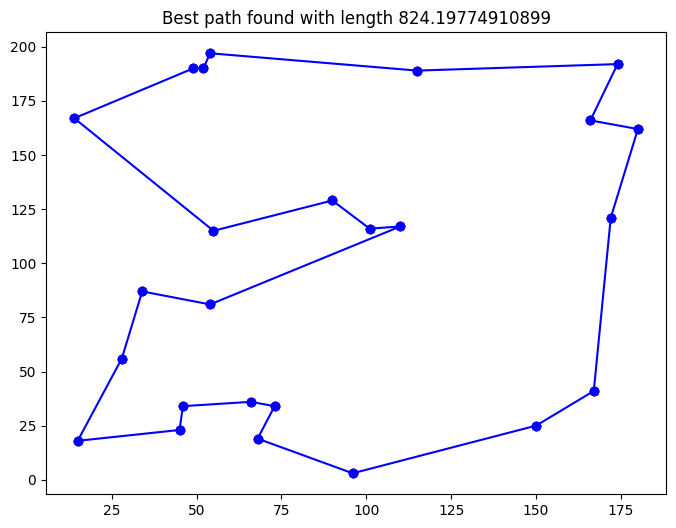

In [38]:
# Cell 8: Plotting the result
def plot_tsp_path(citylist, path):
    coordinates = [(city.x, city.y) for city in citylist]
    plt.figure(figsize=(8, 6))
    for i in range(len(path)):
        start = coordinates[path[i]]
        end = coordinates[path[(i + 1) % len(path)]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'bo-')
    plt.scatter(*zip(*coordinates), color='red')
    plt.title(f"Best path found with length {best_path_length}")
    plt.show()

# Running with the best found parameters
best_path, best_path_length = aco_tsp(
    distance_matrix, best_params[0], best_params[1], best_params[2], best_params[3], best_params[4], best_params[5]
)
print(f"Best path found: {best_path} with length {best_path_length}")
plot_tsp_path(citylist, best_path)